# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.

In [3]:
m = 50
n = 12
%load_ext memory_profiler

A,b = main.spare_matrix_Abt(m,n)

# zad 1
t1 = %timeit -r 1 -n 1 -o np.linalg.solve(*main.square_from_rectan(A,b))
x1 = np.linalg.solve(*main.square_from_rectan(A,b))
%memit np.linalg.solve(*main.square_from_rectan(A,b))
print('t1 =',t1.average)
# zad 2
x2 = np.linalg.lstsq(A,b)
%memit np.linalg.lstsq(A,b)
t2 = %timeit -r 1 -n 1 -o np.linalg.lstsq(A,b)
print('t2 =',t2.average)
# zad 3
q,r = np.linalg.qr(A)
x3 = sp.linalg.solve_triangular(r,q.transpose() @ b)
# t31 = %timeit -r 1 -n 1 -o np.linalg.qr(A)
# t32 = %timeit -r 1 -n 1 -o sp.linalg.solve_triangular(r,q.transpose(A) @ b)
%memit np.linalg.qr(A)
%memit sp.linalg.solve_triangular(r,q.transpose() @ b)
# t3 = t31 + t32
print('can not measure time')
# zad 4
u, s, v = sp.linalg.svd(A,full_matrices=False)
s = np.diag(s)
x4 = v.transpose() @ np.linalg.inv(s) @ u.transpose() @ b
t41 = %timeit -r 1 -n 1 -o sp.linalg.svd(A)
t42 = %timeit -r 1 -n 1 -o v@np.linalg.inv(s)@u.transpose()@b
%memit sp.linalg.svd(A)
%memit v @ np.linalg.inv(s) @ u.transpose() @ b
t4 = t41.average + t42.average
print('t4 =', t4)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
peak memory: 92.35 MiB, increment: 0.23 MiB
t1 = 0.002000300000000621
peak memory: 92.61 MiB, increment: 0.00 MiB
128 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
t2 = 0.00012820000000068887
peak memory: 92.77 MiB, increment: 0.00 MiB
peak memory: 92.77 MiB, increment: 0.00 MiB
can not measure time
170 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
134 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
peak memory: 93.16 MiB, increment: 0.00 MiB
peak memory: 93.16 MiB, increment: 0.00 MiB
t4 = 0.00030399999999985994


<ipython-input-3-9d2d402129f8>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x2 = np.linalg.lstsq(A,b)
<string>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Zad 6 - najszybciej ( z tych które dało się zmierzyć działa funkcja solve

2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

***Zadanie 2***  

In [4]:
x1 = np.random.normal(0,1,(100,1))
x2 = np.random.normal(0,1,(100,1))
epsilon = np.random.normal(0,1,(100,1))
y = 2 +x1-0.5*x2+epsilon
one_con_1 = np.concatenate((np.ones(100).reshape(100,1),x1),axis=1)
one_con_2 = np.concatenate((np.ones(100).reshape(100,1),x2),axis=1)
one_con_3 = np.concatenate((np.ones(100).reshape(100,1),x1,x2),axis=1)
q0,r0 = np.linalg.qr(one_con_1)
q1,r1 = np.linalg.qr(one_con_2)
q2,r2 = np.linalg.qr(one_con_3)
a1 = np.linalg.inv(r0) @ q0.transpose()
a2 = np.linalg.inv(r1) @ q1.transpose()
a3 = np.linalg.inv(r2) @ q2.transpose()

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

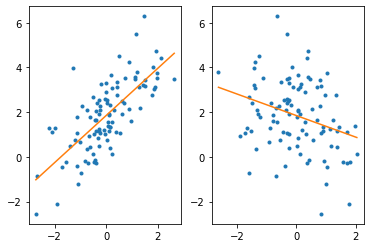

In [16]:
import scipy as sp
from matplotlib import pyplot as plt
q1,r1 = np.linalg.qr(one_con_1)
wsp1 = sp.linalg.solve_triangular(r1,q1.T@y)

q2,r2 = np.linalg.qr(one_con_2)
wsp2 = sp.linalg.solve_triangular(r2,q2.T@y)

q3,r3 = np.linalg.qr(one_con_3)
wsp3 = sp.linalg.solve_triangular(r3,q3.T@y)

pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]
_,axes = plt.subplots(1,2)
ax = axes[0]
ax.plot(x1,y,'.')
ax.plot(pred1, wsp1[0]+wsp1[1]*pred1)
ax = axes[1]
ax.plot(x2,y,'.')
ax.plot(pred2, wsp2[0]+wsp2[1]*pred2)
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)